In [62]:
using FITSIO

In [63]:
using Plots

In [64]:
;cd proj/julia_interferometry

/home/kjwiik/proj/julia_interferometry


In [65]:
f=FITS("apr09.uvf")

File: apr09.uvf
Mode: "r" (read-only)
HDUs: Num  Name     Ver  Type   
      1                  Image  
      2    AIPS FQ  1    Table  
      3    AIPS AN  1    Table  


In [66]:
header = read_header(f[1])

SIMPLE  =                    T / Standard FITS file
BITPIX  =                  -32 / FITS data type
NAXIS   =                    7 / Dimensionality of array
NAXIS1  =                    0
NAXIS2  =                    3
NAXIS3  =                    4
NAXIS4  =                    1
NAXIS5  =                    1
NAXIS6  =                    1
NAXIS7  =                    1
EXTEND  =                    T / Extensions may be present
GROUPS  =                    T / Random-groups HDU
PCOUNT  =                    7 / Parameter count
GCOUNT  =                 3436 / Number of groups.
CTYPE2  =            'COMPLEX' / Axis name
CRPIX2  =                  1.0 / Reference pixel
CRVAL2  =                  1.0 / Reference value
CDELT2  =                  1.0 / Pixel increment
CROTA2  =                  0.0 / Axis rotation
CTYPE3  =             'STOKES' / Axis name
CRPIX3  =                  1.0 / Reference pixel
CRVAL3  =                 -1.0 / Reference value
CDELT3  =                 -1.0 / Pixel

In [92]:
for k in keys(header)
    @show k, header[k]
end

(k,header[k]) = ("SIMPLE",true)
(k,header[k]) = ("BITPIX",-32)
(k,header[k]) = ("NAXIS",7)
(k,header[k]) = ("NAXIS1",0)
(k,header[k]) = ("NAXIS2",3)
(k,header[k]) = ("NAXIS3",4)
(k,header[k]) = ("NAXIS4",1)
(k,header[k]) = ("NAXIS5",1)
(k,header[k]) = ("NAXIS6",1)
(k,header[k]) = ("NAXIS7",1)
(k,header[k]) = ("EXTEND",true)
(k,header[k]) = ("GROUPS",true)
(k,header[k]) = ("PCOUNT",7)
(k,header[k]) = ("GCOUNT",3436)
(k,header[k]) = ("CTYPE2","COMPLEX")
(k,header[k]) = ("CRPIX2",1.0)
(k,header[k]) = ("CRVAL2",1.0)
(k,header[k]) = ("CDELT2",1.0)
(k,header[k]) = ("CROTA2",0.0)
(k,header[k]) = ("CTYPE3","STOKES")
(k,header[k]) = ("CRPIX3",1.0)
(k,header[k]) = ("CRVAL3",-1.0)
(k,header[k]) = ("CDELT3",-1.0)
(k,header[k]) = ("CROTA3",0.0)
(k,header[k]) = ("CTYPE4","FREQ")
(k,header[k]) = ("CRPIX4",1.0)
(k,header[k]) = ("CRVAL4",4.32177472117e10)
(k,header[k]) = ("CDELT4",2.6e7)
(k,header[k]) = ("CROTA4",0.0)
(k,header[k]) = ("CTYPE5","IF")
(k,header[k]) = ("CRPIX5",1.0)
(k,header[k]) = ("CRVA

In [67]:
header["NAXIS2"]

3

In [68]:
f[3]

File: apr09.uvf
HDU: 3 (name="AIPS AN", ver=1)
Type: Table
Rows: 10
Columns: Name     Size  Type     TFORM  
         ANNAME         String   8A     
         STABXYZ  (3,)  Float64  3D     
         ORBPARM  (0,)  Float64  0D     
         NOSTA          Int32    1J     
         MNTSTA         Int32    1J     
         STAXOF         Float32  1E     
         POLTYA         String   1A     
         POLAA          Float32  1E     
         POLCALA  (2,)  Float32  2E     
         POLTYB         String   1A     
         POLAB          Float32  1E     
         POLCALB  (2,)  Float32  2E     


In [69]:
read(f[3],"ANNAME")

10-element Array{String,1}:
 "BR"
 "FD"
 "HN"
 "KP"
 "LA"
 "MK"
 "NL"
 "OV"
 "PT"
 "SC"

In [70]:
read(f[3],"STABXYZ")

3×10 Array{Float64,2}:
 -2.11207e6  -1.32401e6  1.44637e6  …  -2.40915e6  -1.64095e6  2.60785e6
  3.70536e6   5.33218e6  4.44794e6      4.47857e6   5.01482e6  5.48807e6
  4.72681e6   3.23196e6  4.32231e6      3.83862e6   3.57541e6  1.93274e6

In [71]:
read(f[3],"ANNAME")[10]

"SC"

In [72]:
#fits_read_col(f::FITSFile, colnum::Integer, firstrow::Integer, firstelem::Integer, data::Array)

In [73]:
data=zeros(Float32,header["PCOUNT"]*header["GCOUNT"]);

In [74]:
using FITSIO.Libcfitsio

In [75]:
ff=fits_open_file("apr09.uvf")

FITSIO.Libcfitsio.FITSFile(Ptr{Void} @0x0000000004d1cbd0)

In [103]:
fits_read_col(ff,1,1,1,data)

In [86]:
data

24052-element Array{Float32,1}:
   1.40221   
   0.541172  
   5.89892   
   1.37443   
   0.855598  
  68.8316    
   0.176978  
   0.415689  
  11.2067    
  -0.429001  
  -0.432436  
  13.0704    
   1.52735   
   ⋮         
   0.117772  
 192.34      
   0.0448382 
   0.00550166
 521.523     
   0.0180689 
   0.208052  
 464.398     
   1.55247   
   0.170068  
 306.012     
   1.54831   

In [81]:
header["PCOUNT"]

7

In [80]:
header["GCOUNT"]

3436

In [104]:
r=reshape(data,header["PCOUNT"],header["GCOUNT"])

7×3436 Array{Float32,2}:
   0.00368597    0.00261533    0.00273434  …     0.000103477    -0.00223165 
   0.00521252    0.00491358    0.00277978        0.00438738     -0.000300581
   3.63997f-5   -0.0018345     0.00109908       -0.00339759      0.00233789 
 260.0         261.0         264.0            1801.0          2057.0        
  91.0          91.0          91.0              91.0            91.0        
   0.0519676     0.0519676     0.0519676   …     0.440162        0.440162   
  15.7286       15.7286       15.7286           47.1859         47.1859     

In [83]:
using Plots


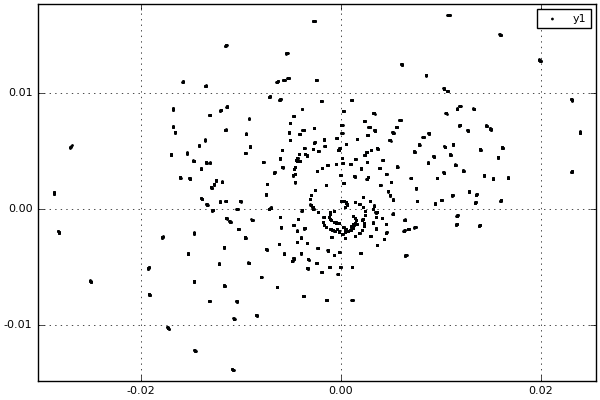

In [108]:
scatter(r[1,:], r[2,:],msize=1)

In [66]:
fits_read_keyword(ff,"GCOUNT")

("3436","Number of groups.")

In [67]:
fits_read_keyword(ff,"PCOUNT")[1]

"7"

In [68]:
fits_read_keyword(ff,"PCOUNT")[2]

"Parameter count"

In [69]:
fits_get_num_hdus(ff)

3

In [73]:
fits_movabs_hdu(ff,3)

:binary_table

In [74]:
fits_read_keyword(ff,"ANNAME")

LoadError: LoadError: keyword not found in header
while loading In[74], in expression starting on line 1

In [10]:
function nodict(n)
    a=0.0;b = 0.5
    for i in 1:n
        a+=sin(b)
    end
end

nodict (generic function with 1 method)

In [11]:
function dict(n,d)
    a=0.0
    for i in 1:n
        a+=sin(d["b"])
    end
end

dict (generic function with 1 method)

In [12]:
function dict_preass(n,d)
    a=0.0
    b=d["b"]
    for i in 1:n
        a+=sin(b)
    end
end

dict_preass (generic function with 1 method)

In [7]:
d=Dict("b" => 0.5)

Dict{String,Float64} with 1 entry:
  "b" => 0.5

In [15]:
@time nodict(100000);@time dict(100000,d);@time dict_preass(100000,d);

  0.001525 seconds (4 allocations: 160 bytes)
  0.007271 seconds (4 allocations: 160 bytes)
  0.001058 seconds (4 allocations: 160 bytes)


In [18]:
const D=Dict("b" => 0.5)

Dict{String,Float64} with 1 entry:
  "b" => 0.5

In [22]:
@time nodict(100000);@time dict(100000,D);@time dict_preass(100000,D);

  0.001444 seconds (4 allocations: 160 bytes)
  0.008091 seconds (4 allocations: 160 bytes)
  0.001063 seconds (4 allocations: 160 bytes)


In [57]:
# https://groups.google.com/d/msg/julia-users/cuFwMZXt5FQ/5oxzf21p9xIJ


In [47]:
make_arg(nm::Symbol, typ::DataType) = Expr(:(::), nm, :($typ))

make_arg (generic function with 1 method)

In [48]:
function make_type(name::Symbol, fields::Vector{Symbol}, types::Vector{DataType})
    fs = map(x->make_arg(x...), zip(fields, types))
    Expr(:type, true, name, Expr(:block, fs...))
end

make_type (generic function with 1 method)

In [52]:
types = make_type(:Testing,[:a, :b], [Float64, Float64])

:(type Testing
        a::Float64
        b::Float64
    end)

In [55]:
eval(types)

In [58]:
a=Testing(1,2)

Testing(1.0,2.0)

In [61]:
a.a

1.0

In [24]:
function composite_type(n,c)
    a=0.0
    
    for i in 1:n
        a+=sin(c.b)
    end
end

composite_type (generic function with 1 method)

In [26]:
type Foo; b::Float64; end

In [27]:
c=Foo(0.5)

Foo(0.5)

In [28]:
c.b

0.5

In [35]:
@time nodict(10000000);@time dict(10000000,D);@time dict_preass(10000000,D); @time composite_type(10000000,c);

  0.161319 seconds (4 allocations: 160 bytes)
  0.638035 seconds (4 allocations: 160 bytes)
  0.105564 seconds (4 allocations: 160 bytes)
  0.106916 seconds (4 allocations: 160 bytes)


In [118]:
fname = Symbol[];ftype = DataType[]; fvalue = Any[];

In [131]:
for k in keys(header)
    if k == "HISTORY"
        break
    elseif ismatch(r"^CT", k) || ismatch(r"^CR", k) || ismatch(r"^CD", k) || ismatch(r"^PT", k) || ismatch(r"^PS", k) || ismatch(r"^PZ", k) 
        continue
    end
    val = header[k]
    push!(fname, Symbol(k))
    push!(ftype, typeof(val))
    push!(fvalue, val)
    @show k val typeof(val)
end

k = "SIMPLE"
val = true
typeof(val) = Bool
k = "BITPIX"
val = -32
typeof(val) = Int64
k = "NAXIS"
val = 7
typeof(val) = Int64
k = "NAXIS1"
val = 0
typeof(val) = Int64
k = "NAXIS2"
val = 3
typeof(val) = Int64
k = "NAXIS3"
val = 4
typeof(val) = Int64
k = "NAXIS4"
val = 1
typeof(val) = Int64
k = "NAXIS5"
val = 1
typeof(val) = Int64
k = "NAXIS6"
val = 1
typeof(val) = Int64
k = "NAXIS7"
val = 1
typeof(val) = Int64
k = "EXTEND"
val = true
typeof(val) = Bool
k = "GROUPS"
val = true
typeof(val) = Bool
k = "PCOUNT"
val = 7
typeof(val) = Int64
k = "GCOUNT"
val = 3436
typeof(val) = Int64
k = "ORIGIN"
val = "AIPSlocalhost    BUSGJ                31DEC09"
typeof(val) = String
k = "DATE-OBS"
val = "2009-04-01"
typeof(val) = String
k = "TELESCOP"
val = "VLBA"
typeof(val) = String
k = "OBSERVER"
val = "S1136"
typeof(val) = String
k = "OBJECT"
val = "1156+295"
typeof(val) = String
k = "EPOCH"
val = 2000.0
typeof(val) = Float64
k = "BSCALE"
val = 1.0
typeof(val) = Float64
k = "BZERO"
val = 0.0
typeof(va

In [ ]:
for i in 1:header["PCOUNT"]
    fname = header["PTYPE$i"]
    d = view(data, i, :)*header["PSCAL$i"] + header["PZERO$i"]
    setfield(obs, fname, d)
end

In [123]:
fvalue

127-element Array{Any,1}:
 true       
  -32       
    7       
    0       
    3       
    4       
    1       
    1       
    1       
    1       
 true       
 true       
    7       
    ⋮       
     nothing
     nothing
     nothing
     nothing
     nothing
     nothing
     nothing
     nothing
     nothing
     nothing
     nothing
     nothing

In [111]:
typeof(header["EXTEND"])

Bool

In [119]:
a=rand(5);b=rand(5);zip(a,b)

Base.Zip2{Array{Float64,1},Array{Float64,1}}([0.442046,0.748914,0.878607,0.282107,0.505286],[0.585354,0.12213,0.534296,0.54128,0.0338824])

In [121]:
Symbol("a")

:a